In [1]:
# train a perceptron in sklearn
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report


iris = load_iris()
x = iris.data[:, (2,3)]
y = (iris.target == 0).astype(int)

per_clf = Perceptron()
per_clf_fit = per_clf.fit(x,y)

print(classification_report(y,per_clf_fit.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [37]:
#load fashion mnist dataset

import tensorflow as tf
from tensorflow import keras 

mnist = keras.datasets.fashion_mnist

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [38]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat',
                'Sandal','Shirt','Sneaker','Bag','Ankle boot']    

In [39]:
# build the neural network

model = keras.models.Sequential() # start the model
model.add(keras.layers.Flatten(input_shape=[28,28])) # This is the input layer. Flatten the data. Original data is 28 by 28 pixels
model.add(keras.layers.Dense(300, activation = 'relu')) # first hidden layer
model.add(keras.layers.Dense(100, activation = 'relu')) # another hidden layer
model.add(keras.layers.Dense(10, activation = 'softmax')) #this is the output layer. 10 neurons for ten fashion classes softmax activation because the classes are exclusive

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_42 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [40]:
# setup the model compiler

model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = 'sgd',
                metrics = ['accuracy'])

In [10]:
#run the model

history = model.fit(x_train, y_train, epochs = 30,
                    validation_data = (x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 899us/step - loss: 0.1402 - accuracy: 0.9505 - val_loss: 0.2931 - val_accuracy: 0.9032
Epoch 2/30
1719/1719 [==============================] - 1s 870us/step - loss: 0.1367 - accuracy: 0.9513 - val_loss: 0.3739 - val_accuracy: 0.8706
Epoch 3/30
1719/1719 [==============================] - 2s 884us/step - loss: 0.1362 - accuracy: 0.9518 - val_loss: 0.3007 - val_accuracy: 0.9032
Epoch 4/30
1719/1719 [==============================] - 2s 900us/step - loss: 0.1333 - accuracy: 0.9533 - val_loss: 0.3103 - val_accuracy: 0.8962
Epoch 5/30
1719/1719 [==============================] - 2s 897us/step - loss: 0.1308 - accuracy: 0.9535 - val_loss: 0.3105 - val_accuracy: 0.9006
Epoch 6/30
1719/1719 [==============================] - 2s 894us/step - loss: 0.1280 - accuracy: 0.9556 - val_loss: 0.3076 - val_accuracy: 0.9012
Epoch 7/30
1719/1719 [==============================] - 2s 907us/step - loss: 0.1273 - accuracy: 0.9548 - val_loss: 0.3228 -

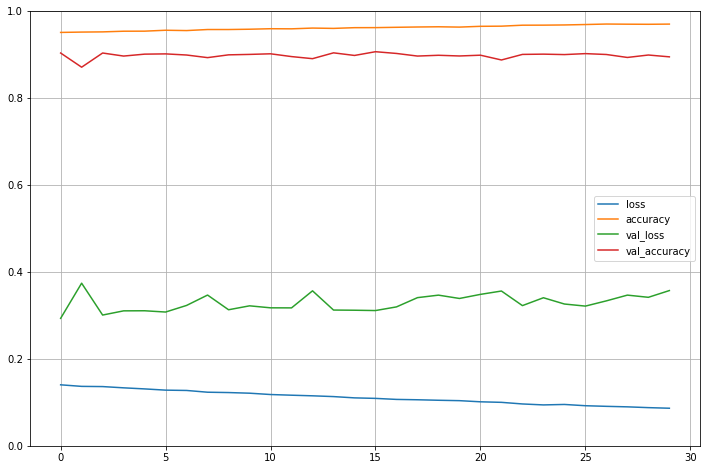

In [11]:
# plot the model history 

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [41]:
# use tensorboard for visualization

import os 
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir() :
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)


In [42]:
# build and compile model 

tensorboard_cb = keras.callbacks.TensorBaord(root_logdir)
history = model.fit(x_train, y_train, epochs = 40,
                    validation_data = (x_valid, y_valid),
                    callbacks = [tensorboard_cb])

AttributeError: module 'tensorflow.keras.callbacks' has no attribute 'TensorBaord'

In [12]:
#evaluate model with test data. 

model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 942us/step - loss: 109.7579 - accuracy: 0.8342


[109.75785064697266, 0.8342000246047974]

In [13]:
# throw in predictions

x_new = x_test[:5]
y_proba = model.predict(x_new)
y_proba

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [8.159427e-16, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [14]:
# predict the classes not the probabilities 

y_pred = np.argmax(model.predict(x_new), axis = 1)
for pred, act in zip(y_pred, y_test[:5]) :
    print(class_names[pred], class_names[act])

Ankle boot Ankle boot
Pullover Pullover
Trouser Trouser
Trouser Trouser
Shirt Shirt


In [15]:
# let's try a regression problem

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

x_train, x_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size = .2)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [16]:
 x_train[:3]

array([[-1.15063729e+00,  1.85076555e+00,  1.15546600e-03,
         5.05358439e-01, -7.59207423e-01, -1.00221603e-01,
        -1.15225900e-01,  2.62743841e-01],
       [ 4.27669941e+00,  1.85595192e-01,  1.24992154e+00,
        -2.20035547e-01,  6.15226030e-02, -4.54607203e-02,
        -8.49958085e-01,  5.52587930e-01],
       [ 8.87578560e-01, -1.00381221e+00,  3.37900436e-01,
         2.50926878e-02, -5.50982234e-02,  3.07273953e-02,
        -9.57594011e-01,  9.47375568e-01]])

In [17]:
reg_model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = x_train.shape[1:]),
    keras.layers.Dense(1)
])

reg_model.compile(loss = 'mean_squared_error', optimizer = 'sgd')
history = reg_model.fit(x_train, y_train, validation_split = 0.1, epochs = 20)
mse_test = reg_model.evaluate(x_test, y_test)
x_new = x_train[:100]
y_pred = reg_model.predict(x_new)

def mse(act,pred) :
    return np.mean((act - pred)**2)

mse(x_train[:100], x_new)

Epoch 1/20
465/465 [==============================] - 0s 643us/step - loss: 0.8881 - val_loss: 0.5638
Epoch 2/20
465/465 [==============================] - 0s 499us/step - loss: 0.5211 - val_loss: 0.4861
Epoch 3/20
465/465 [==============================] - 0s 512us/step - loss: 0.4780 - val_loss: 0.4695
Epoch 4/20
465/465 [==============================] - 0s 513us/step - loss: 0.4603 - val_loss: 0.4405
Epoch 5/20
465/465 [==============================] - 0s 512us/step - loss: 0.4461 - val_loss: 0.4278
Epoch 6/20
465/465 [==============================] - 0s 509us/step - loss: 0.4353 - val_loss: 0.4363
Epoch 7/20
465/465 [==============================] - 0s 525us/step - loss: 0.4256 - val_loss: 0.4188
Epoch 8/20
465/465 [==============================] - 0s 509us/step - loss: 0.4193 - val_loss: 0.4186
Epoch 9/20
465/465 [==============================] - 0s 516us/step - loss: 0.4120 - val_loss: 0.4296
Epoch 10/20
465/465 [==============================] - 0s 511us/step - loss: 0.406

0.0

In [35]:
# wide and deep neural network

input_ = keras.layers.Input(shape = x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
wide_model = keras.Model(inputs = [input_], outputs = [output])

wide_model.compile(loss = 'mse', metrics = ['RootMeanSquaredError'],optimizer = keras.optimizers.SGD(learning_rate = 1e-3))

history1 = wide_model.fit(x_train, y_train, validation_split = .1, epochs = 50)


Epoch 1/50
465/465 [==============================] - 1s 761us/step - loss: 1.6780 - root_mean_squared_error: 1.2954 - val_loss: 0.7500 - val_root_mean_squared_error: 0.8660
Epoch 2/50
465/465 [==============================] - 0s 620us/step - loss: 0.7320 - root_mean_squared_error: 0.8556 - val_loss: 0.6672 - val_root_mean_squared_error: 0.8168
Epoch 3/50
465/465 [==============================] - 0s 621us/step - loss: 0.6621 - root_mean_squared_error: 0.8137 - val_loss: 0.6201 - val_root_mean_squared_error: 0.7875
Epoch 4/50
465/465 [==============================] - 0s 617us/step - loss: 0.6091 - root_mean_squared_error: 0.7805 - val_loss: 0.5929 - val_root_mean_squared_error: 0.7700
Epoch 5/50
465/465 [==============================] - 0s 597us/step - loss: 0.5783 - root_mean_squared_error: 0.7604 - val_loss: 0.5597 - val_root_mean_squared_error: 0.7481
Epoch 6/50
465/465 [==============================] - 0s 625us/step - loss: 0.5547 - root_mean_squared_error: 0.7448 - val_loss: 0

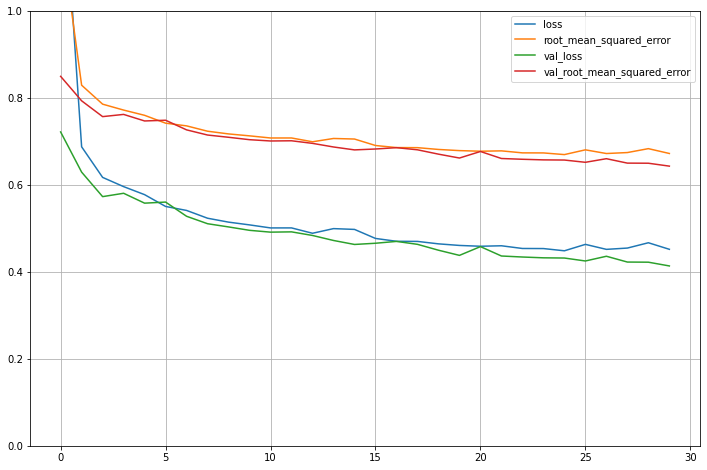

In [34]:
pd.DataFrame(history1.history).plot(figsize = (12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()